In [11]:
import sys

# !pip install kaggle
# !pip install pandas
# !pip install matplotlib

In [12]:
import  os
import glob
import json
import pandas as pd
import matplotlib
from typing import TypedDict

In [13]:
def toWhite(plot):
    plot.tick_params(axis='both', colors='white')
    plot.xaxis.label.set_color("white")
    plot.yaxis.label.set_color("white")

matplotlib.axes.SubplotBase.ws= lambda self :toWhite(self)

In [14]:
# data path
DATA_PATH="./yt/"


In [15]:
class YoutubeFiles(TypedDict):
    json: str
    csv: str
    loc: str

def get_file_dics(path) -> [YoutubeFiles]:
    get_csv=lambda x:os.path.dirname(x)+"/" +\
                    os.path.basename(x)[:2]+"videos.csv"
    return list(map(lambda x:{"json":x , "csv":get_csv(x) , "loc":os.path.basename(x)[:2]},glob.glob(f"{path}*.json")))

def readYTJson(path):
    with open(path,'r') as f:
        data = json.loads(f.read())
    return pd.json_normalize(data["items"])

# some encoding problem . skip it
skip=set(("JP","KR","MX","RU"))
fileDics = list(filter( lambda x:x['loc'] not in skip , get_file_dics(DATA_PATH)))

display(fileDics)

[{'json': './yt/CA_category_id.json', 'csv': './yt/CAvideos.csv', 'loc': 'CA'},
 {'json': './yt/IN_category_id.json', 'csv': './yt/INvideos.csv', 'loc': 'IN'},
 {'json': './yt/DE_category_id.json', 'csv': './yt/DEvideos.csv', 'loc': 'DE'},
 {'json': './yt/US_category_id.json', 'csv': './yt/USvideos.csv', 'loc': 'US'},
 {'json': './yt/FR_category_id.json', 'csv': './yt/FRvideos.csv', 'loc': 'FR'},
 {'json': './yt/GB_category_id.json', 'csv': './yt/GBvideos.csv', 'loc': 'GB'}]

1: 列出所有影片的類別

In [16]:
def getDF(pathDic):
    jd=readYTJson(pathDic['json'])
    cd=pd.read_csv(pathDic['csv'])
    md=pd.merge(left=cd,right=jd.astype({'id': 'int64'}),left_on='category_id' , right_on='id')
    md['loc']=pathDic['loc']
    return md

myDF=pd.concat([getDF(x) for x in fileDics])

#Show data
display(myDF.dtypes)
display(myDF)

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
kind                      object
etag                      object
id                         int64
snippet.channelId         object
snippet.title             object
snippet.assignable          bool
loc                       object
dtype: object

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratings_disabled,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable,loc
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,...,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,CA
1,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,...,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,CA
2,H1KBHFXm2Bg,17.14.11,21 Savage - Bank Account (Official Music Video),21 Savage,10,2017-11-10T19:00:02.000Z,"21 savage|""bank account""|""21 savage bank accou...",5068229,263596,8585,...,False,False,Watch the official music video of Bank Account...,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,CA
3,7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,...,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,CA
4,j67FgNEvyh8,17.14.11,Telefoon || Babbu Maan || Promo || Full Song 1...,Hey Yolo,10,2017-11-12T04:24:34.000Z,"Telefoon|""Babbu Maan""|""Mehfil Mitran Di""|""new ...",178447,4339,96,...,False,False,"Full Song Out Now 15th November\n\nHey Yolo, S...",youtube#videoCategory,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38821,JtIY1Naxg0M,18.10.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1664981,44245,357,...,False,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,GB
38822,JtIY1Naxg0M,18.11.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1673959,44316,357,...,False,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,GB
38823,JtIY1Naxg0M,18.12.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1686873,44434,360,...,False,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,GB
38824,JtIY1Naxg0M,18.13.06,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1699351,44506,361,...,False,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,GB


2: 列出 所有 rap 影片 的dislike 數目

In [17]:
d2=myDF[myDF['tags'].str.contains('"rap"')][['video_id','title','dislikes']]
display(d2)

,video_id,title,dislikes
2,H1KBHFXm2Bg,21 Savage - Bank Account (Official Music Video),8585
8,MbyP-w4uOgk,NAV - Wanted You feat. Lil Uzi Vert (Official ...,466
10,amEZKmJQ4Io,Drako - Watch Me Do It [Official Video],0
15,NVCqz2BDfcQ,Gucci Mane - Curve (ft. The Weeknd),816
23,H1KBHFXm2Bg,21 Savage - Bank Account (Official Music Video),9262
...,...,...,...
30839,RtvUoab88UE,Dear Ms. Banks,755
30847,RtvUoab88UE,Dear Ms. Banks,785
30855,RtvUoab88UE,Dear Ms. Banks,795
31253,BLOIU9DpLq4,G-Eazy with Halsey - Him & I,284


3: 找出發布時間與地區 和 喜歡人數的線性關係

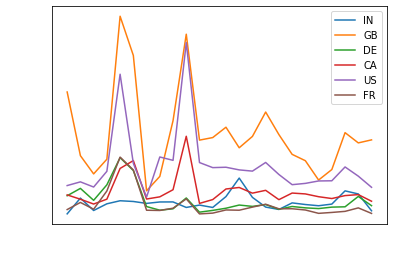

In [18]:
d3=myDF[['publish_time','likes','loc']]
# "2017-11-10T17:00:03.000Z"
d3=d3.assign(**{'publish_time':d3['publish_time'].astype('datetime64[ns]')})
d3=d3.assign(**{'hour':d3['publish_time'].map(lambda x:x.hour)})

mean3=d3.groupby(['hour','loc'])['likes'].mean().reset_index('hour')

index = list(set(mean3.index))

p3= mean3.loc[index[0]].plot(x='hour', y ='likes' ,label=index[0],)
p3.ws()
for x in index[1:]:
    mean3.loc[x].plot(x='hour', y ='likes' , label=x ,ax=p3 )


4: 排序出最多人不喜歡的前十名種類影片

In [19]:
d4=myDF[['title','category_id','dislikes','snippet.title']]

#前十名  的 影片種類
d4_tmp1=d4.sort_values(by=['dislikes'],ascending=False).head(10)

#前十名種類  (每種取平均)
d4_tmp2= d4.groupby(['snippet.title'],as_index=False)[['dislikes']].mean()\
    .sort_values(by=['dislikes'],ascending=False)\
    .head(10)


display(d4_tmp1)
display(d4_tmp2)

,title,category_id,dislikes,snippet.title
4943,So Sorry.,24,1944971,Entertainment
4884,So Sorry.,24,1928677,Entertainment
4824,So Sorry.,24,1911836,Entertainment
4766,So Sorry.,24,1890743,Entertainment
4710,So Sorry.,24,1868756,Entertainment
4654,So Sorry.,24,1843521,Entertainment
4592,So Sorry.,24,1802219,Entertainment
3706,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,1753274,Entertainment
3656,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,1739579,Entertainment
3609,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,24,1732859,Entertainment


,snippet.title,dislikes
10,Nonprofits & Activism,58076.859649
8,Music,7923.005068
3,Entertainment,2920.193620
5,Gaming,2466.165364
4,Film & Animation,1719.581113
15,Sports,1630.066358
13,Science & Technology,1624.194739
11,People & Blogs,1615.844172
1,Comedy,1557.482132
7,Movies,1431.542857


5: 排序出前十名的類別  喜歡 和 不喜歡的比例 擁有最大的變異數

In [20]:
d5=myDF[['title','category_id','dislikes','likes','snippet.title']]
d5=d5.assign(**{"ratio":d5["likes"]/(d5["likes"]+d5["dislikes"])})

d5_tmp1=d5.groupby(['snippet.title'],as_index=False)[['ratio']].var().head(10)\
    .sort_values(by=['ratio'],ascending=False)

display(d5_tmp1)

,snippet.title,ratio
9,News & Politics,0.024562
3,Entertainment,0.011710
0,Autos & Vehicles,0.010287
4,Film & Animation,0.008383
5,Gaming,0.007659
2,Education,0.004565
6,Howto & Style,0.003928
8,Music,0.003099
1,Comedy,0.002902
7,Movies,0.001479
